In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [13]:
df = pd.read_csv("../data/usgs_data_small.csv")
df.isna().sum()

time              0
longitude         0
latitude          0
depth          1606
mag          164502
dtype: int64

In [14]:
df.dropna(inplace=True)
df

,time,longitude,latitude,depth,mag
0,1940-01-06 20:04:35.170000,25.814000,35.373000,15.00,5.84
2,1940-01-06 09:15:39.210000,151.498000,45.077000,25.00,6.07
3,1940-01-05 09:42:55.570000,-116.367333,33.173167,6.00,3.42
4,1940-01-05 07:20:50.460000,-119.442000,32.929333,6.00,3.97
5,1940-01-04 21:44:55.390000,37.926000,40.415000,15.00,5.51
...,...,...,...,...,...
4329143,2023-09-24 02:20:39.520000,-117.314167,34.071333,16.11,1.09
4329144,2023-09-24 02:11:22.160000,-155.259000,58.195167,2.55,0.14
4329145,2023-09-24 02:10:46.071000,-119.668800,40.223400,8.40,0.70
4329146,2023-09-24 02:06:35.040000,-123.223333,39.279500,4.43,1.91


In [15]:
df["time"] = df["time"].apply(lambda x: x[:4])
df = df[df["time"] > "1950"]

<Axes: xlabel='time'>

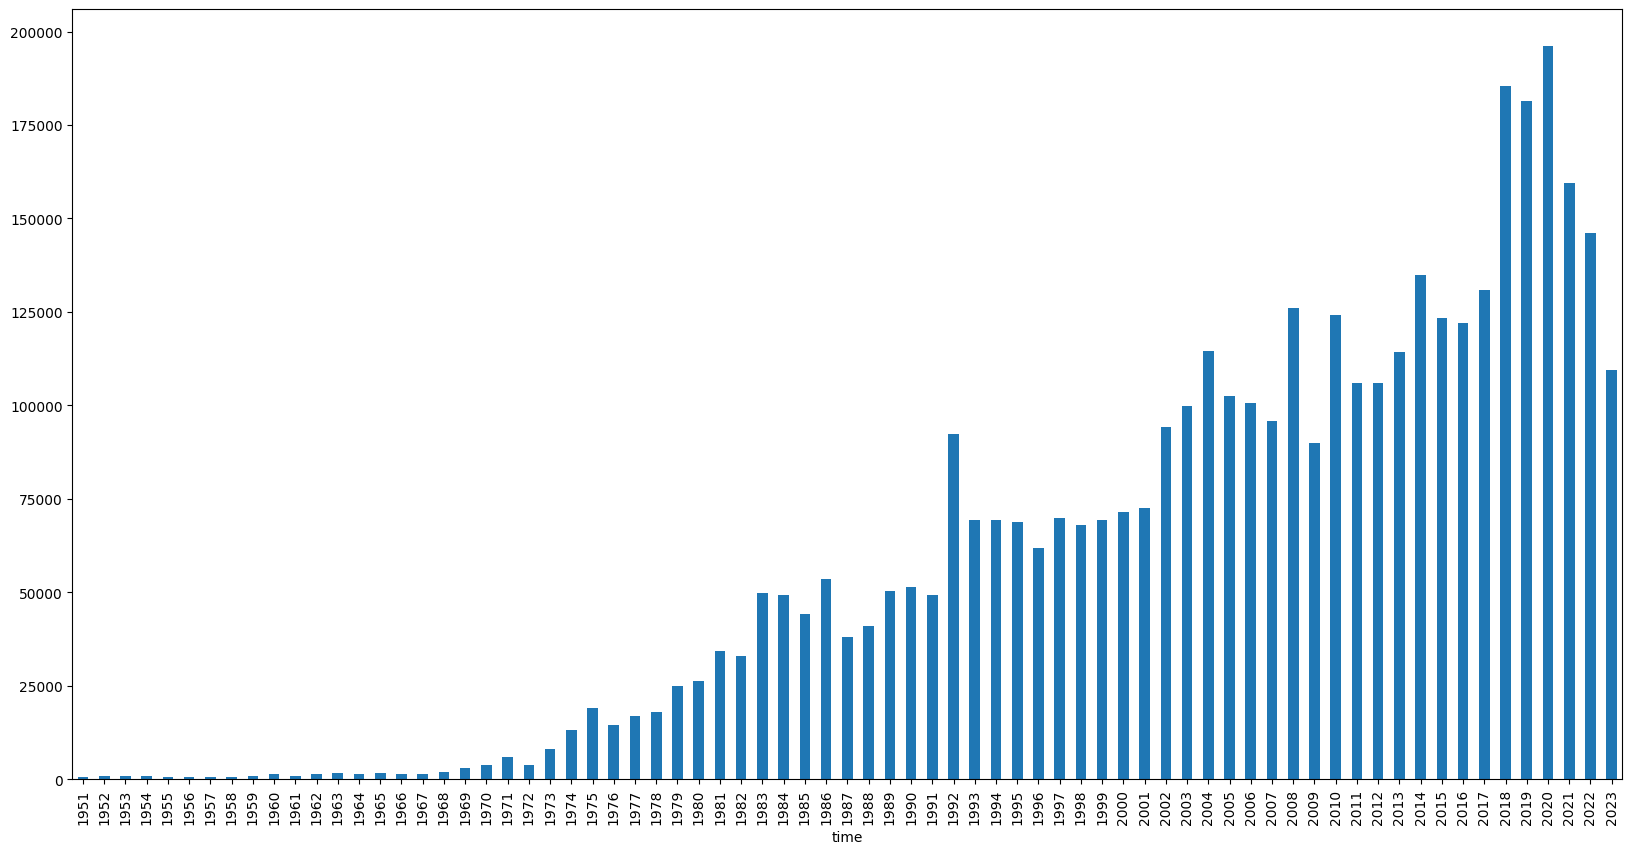

In [16]:
# plot count of earthquakes over time on barplot
df["time"].value_counts().sort_index().plot.bar(figsize=(20, 10))

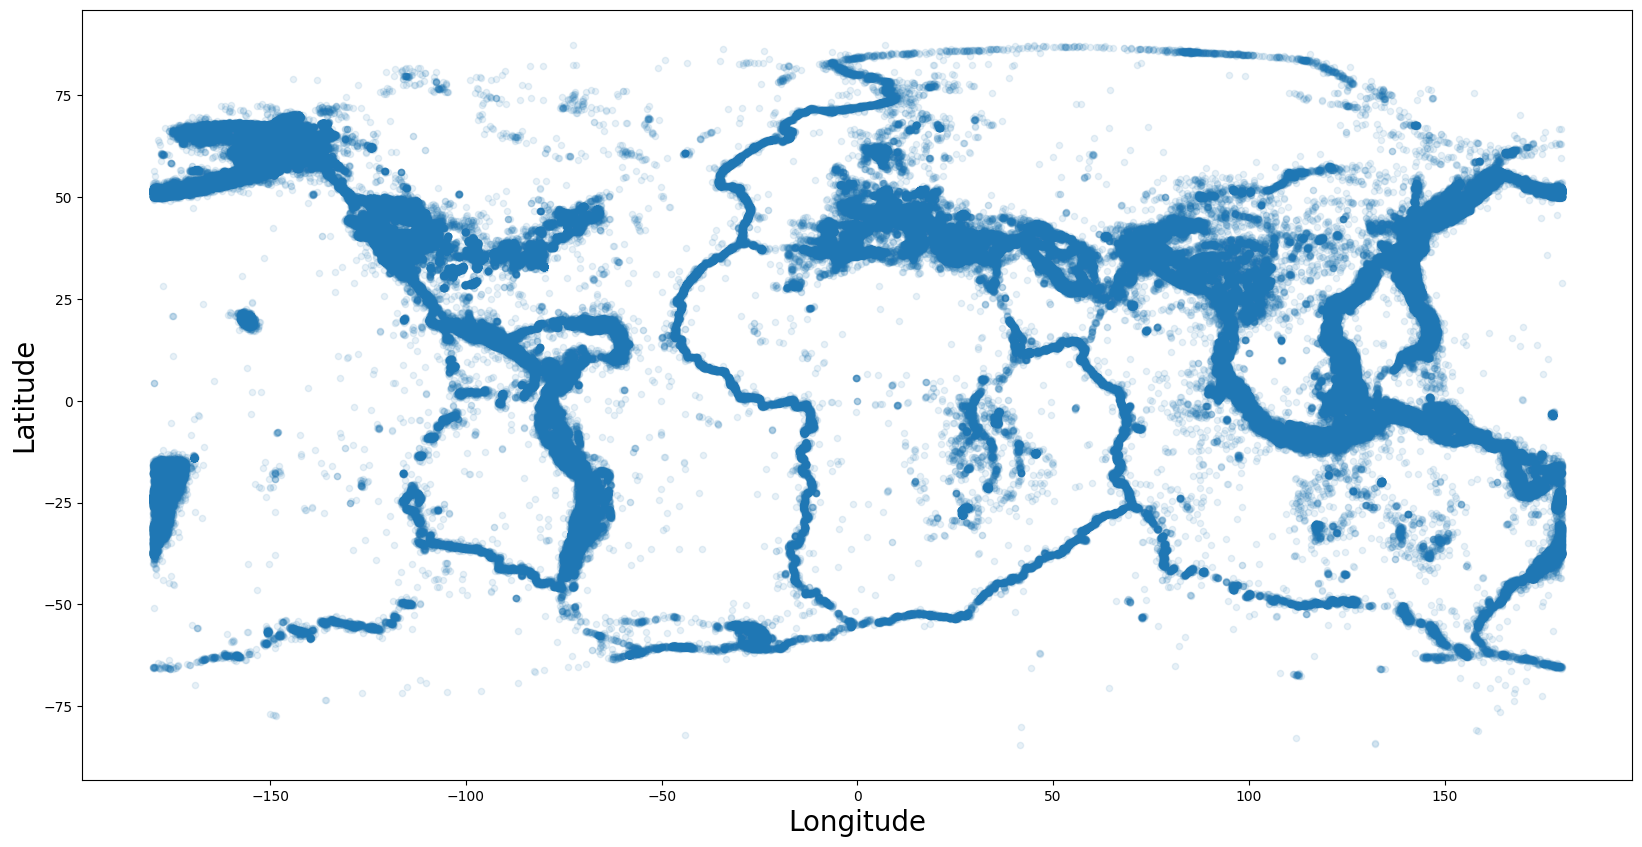

In [17]:
# plot count of earthquakes over longitude and latitude
df.plot.scatter(x="longitude", y="latitude", alpha=0.1, figsize=(20, 10))
plt.xlabel("Longitude", fontsize=20)
plt.ylabel("Latitude", fontsize=20)
# plt.xticks(fontsize=12)
# plt.yticks(fontsize=12)
plt.show()

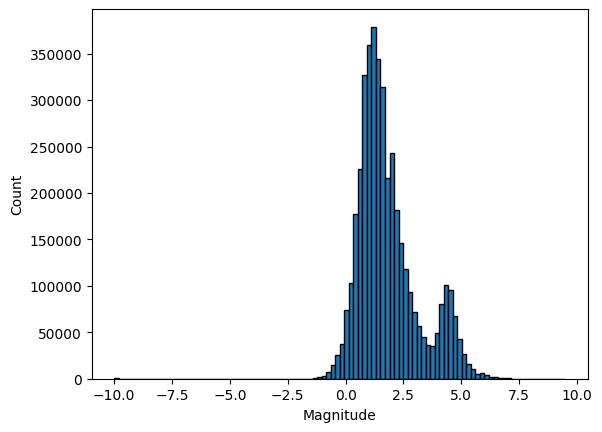

In [11]:
# plot magnitude
df["mag"].plot.hist(bins=100, edgecolor="black")
plt.ylabel("Count")
plt.xlabel("Magnitude")
# plt.xticks(fontsize=12)
# plt.yticks(fontsize=12)
plt.show()

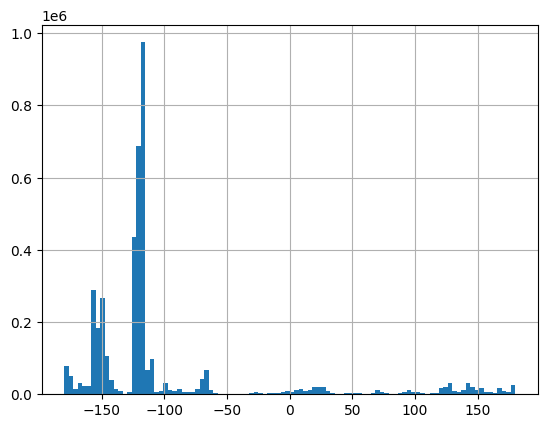

In [8]:
# plot count of earthquakes over longitude
df["longitude"].hist(bins=100)
plt.show()

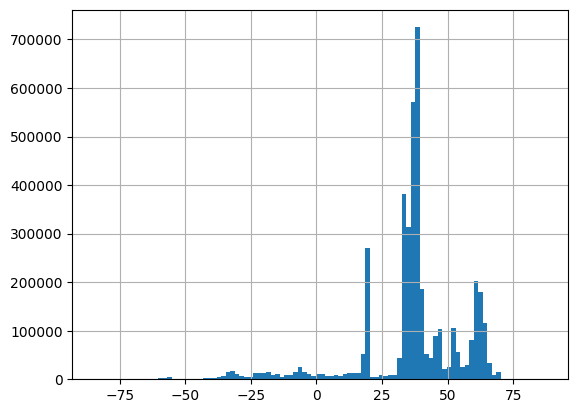

In [9]:
# plot count of earthquakes over latitude
df["latitude"].hist(bins=100)
plt.show()

In [10]:
geo_split = 1

In [11]:
df["latitude"] = df["latitude"] // geo_split
df["latitude"] = df["latitude"] + np.abs(np.min(df["latitude"]))

df["longitude"] = df["longitude"] // geo_split
df["longitude"] = df["longitude"] + np.abs(np.min(df["longitude"]))
df["pos"] = df["latitude"].astype(str) + "_" + df["longitude"].astype(str)

In [12]:
df

,time,longitude,latitude,depth,mag,pos
20790,1951,99.0,92.0,54.40,6.59,92.0_99.0
20792,1951,64.0,117.0,6.00,3.29,117.0_64.0
20793,1951,64.0,117.0,6.00,3.03,117.0_64.0
20794,1951,99.0,92.0,15.00,5.91,92.0_99.0
20795,1951,63.0,118.0,6.00,2.77,118.0_63.0
...,...,...,...,...,...,...
4329143,2023,62.0,119.0,16.11,1.09,119.0_62.0
4329144,2023,24.0,143.0,2.55,0.14,143.0_24.0
4329145,2023,60.0,125.0,8.40,0.70,125.0_60.0
4329146,2023,56.0,124.0,4.43,1.91,124.0_56.0


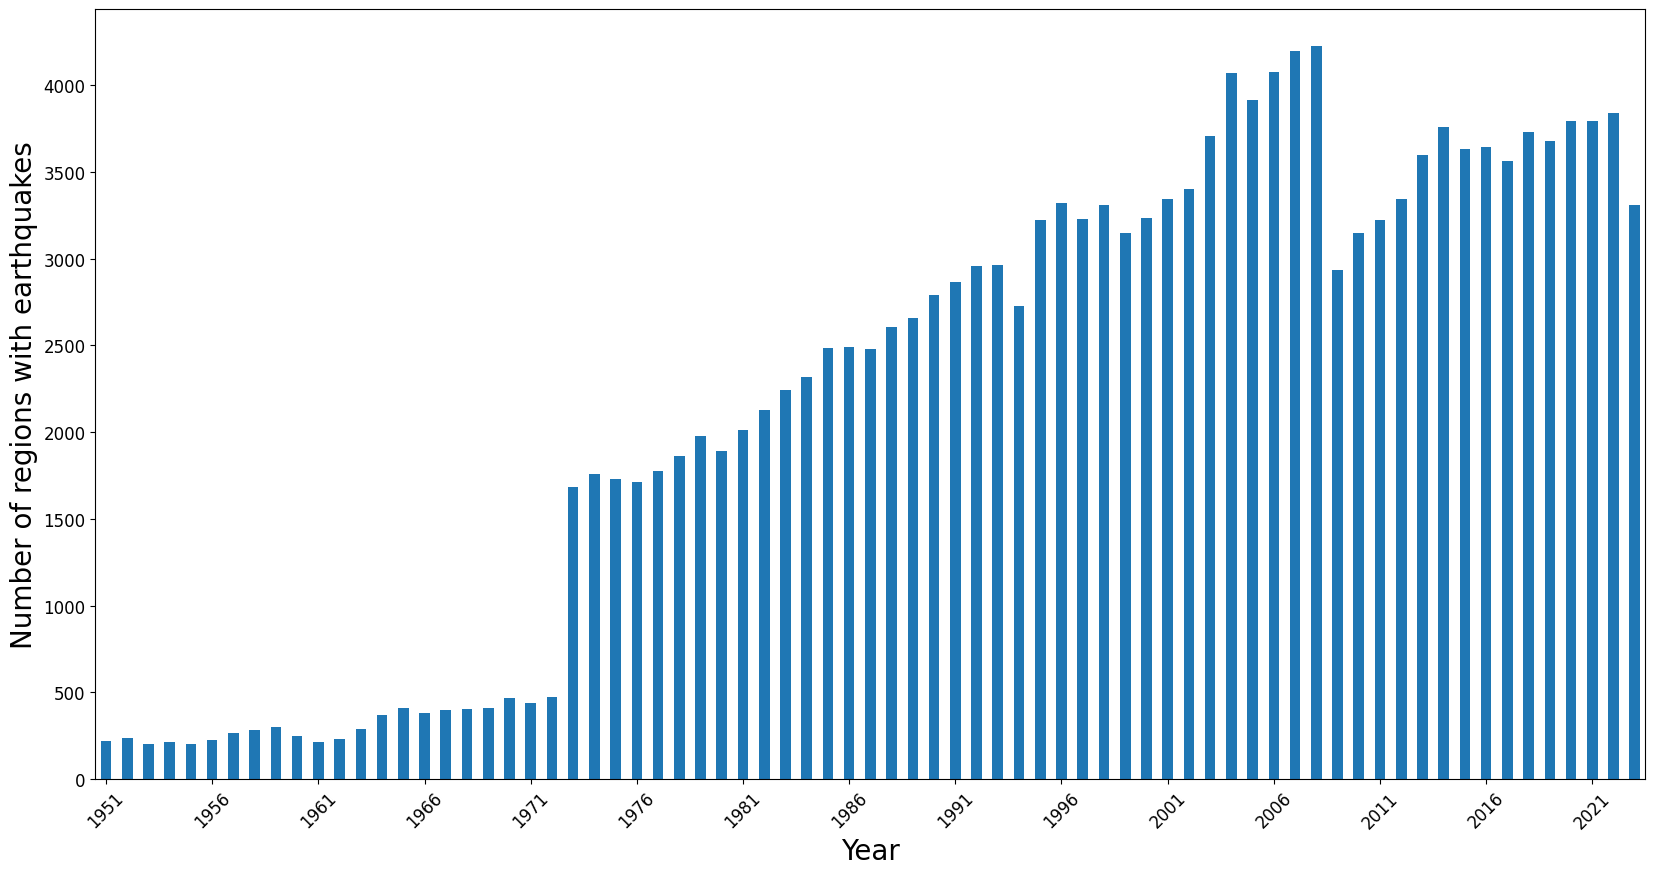

In [13]:
# get number of regions with eq per year
df.groupby(["time", "pos"]).count().reset_index().groupby("time").agg({"mag": "count"}).plot.bar(figsize=(20, 10), legend=False)
plt.xlabel("Year", fontsize=20)
plt.ylabel("Number of regions with earthquakes", fontsize=20)
plt.xticks(np.arange(0, len(df["time"].unique()), 5), df["time"].unique()[::5], rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.show()

<Axes: xlabel='time'>

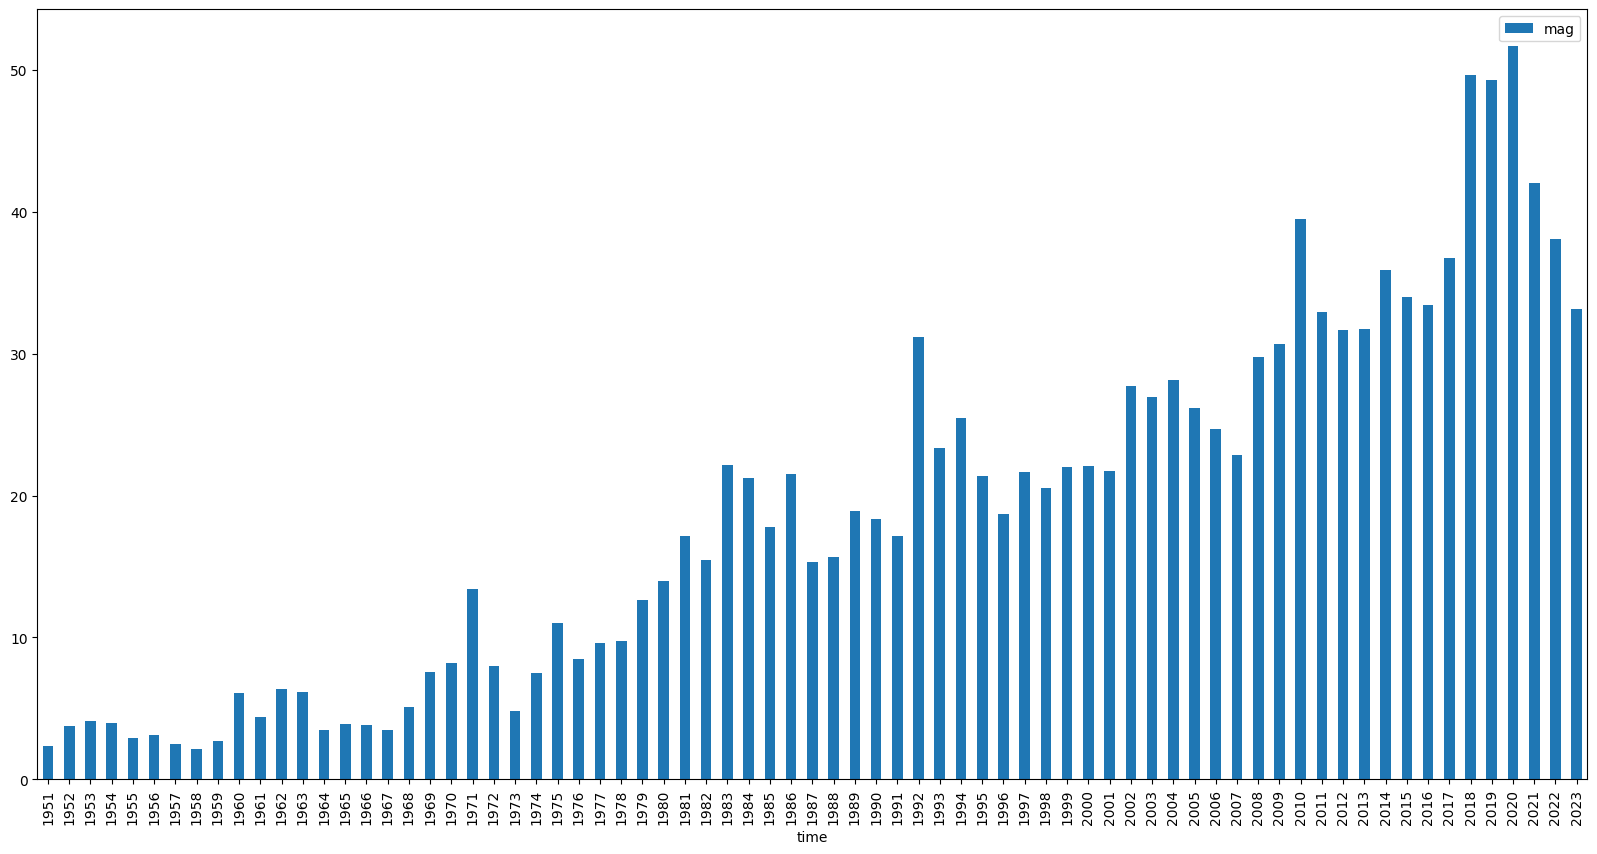

In [14]:
# get average number of earthquakes per region per year
df.groupby(["time", "pos"]).count().reset_index().groupby("time").agg({"mag": "mean"}).plot.bar(figsize=(20, 10))

<Axes: xlabel='time'>

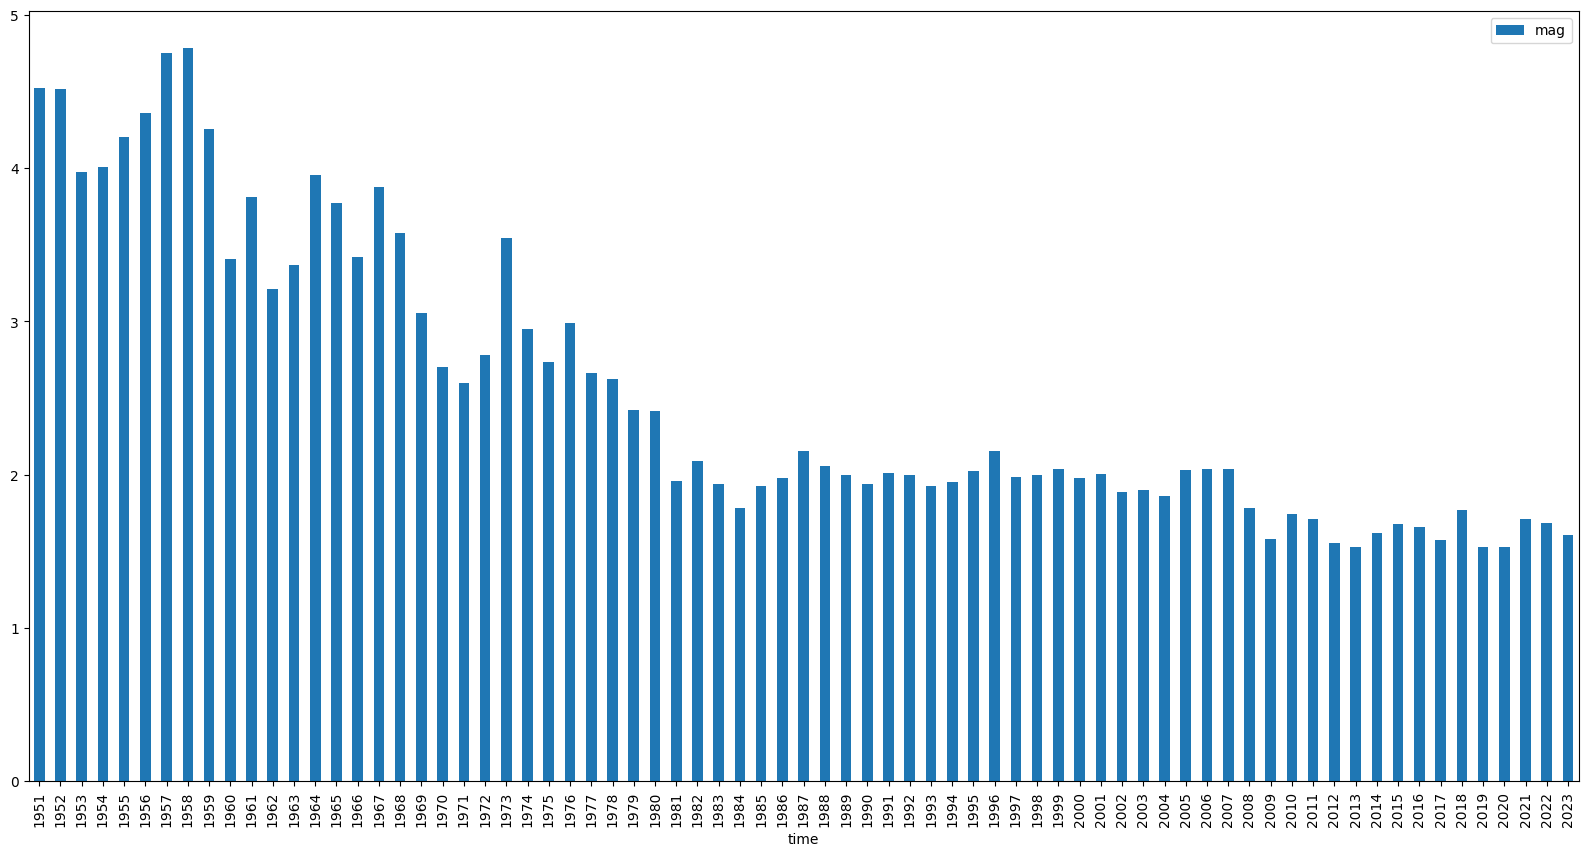

In [15]:
# get mean magnitude per year
df.groupby("time").agg({"mag": "mean"}).plot.bar(figsize=(20, 10))

<Axes: xlabel='time'>

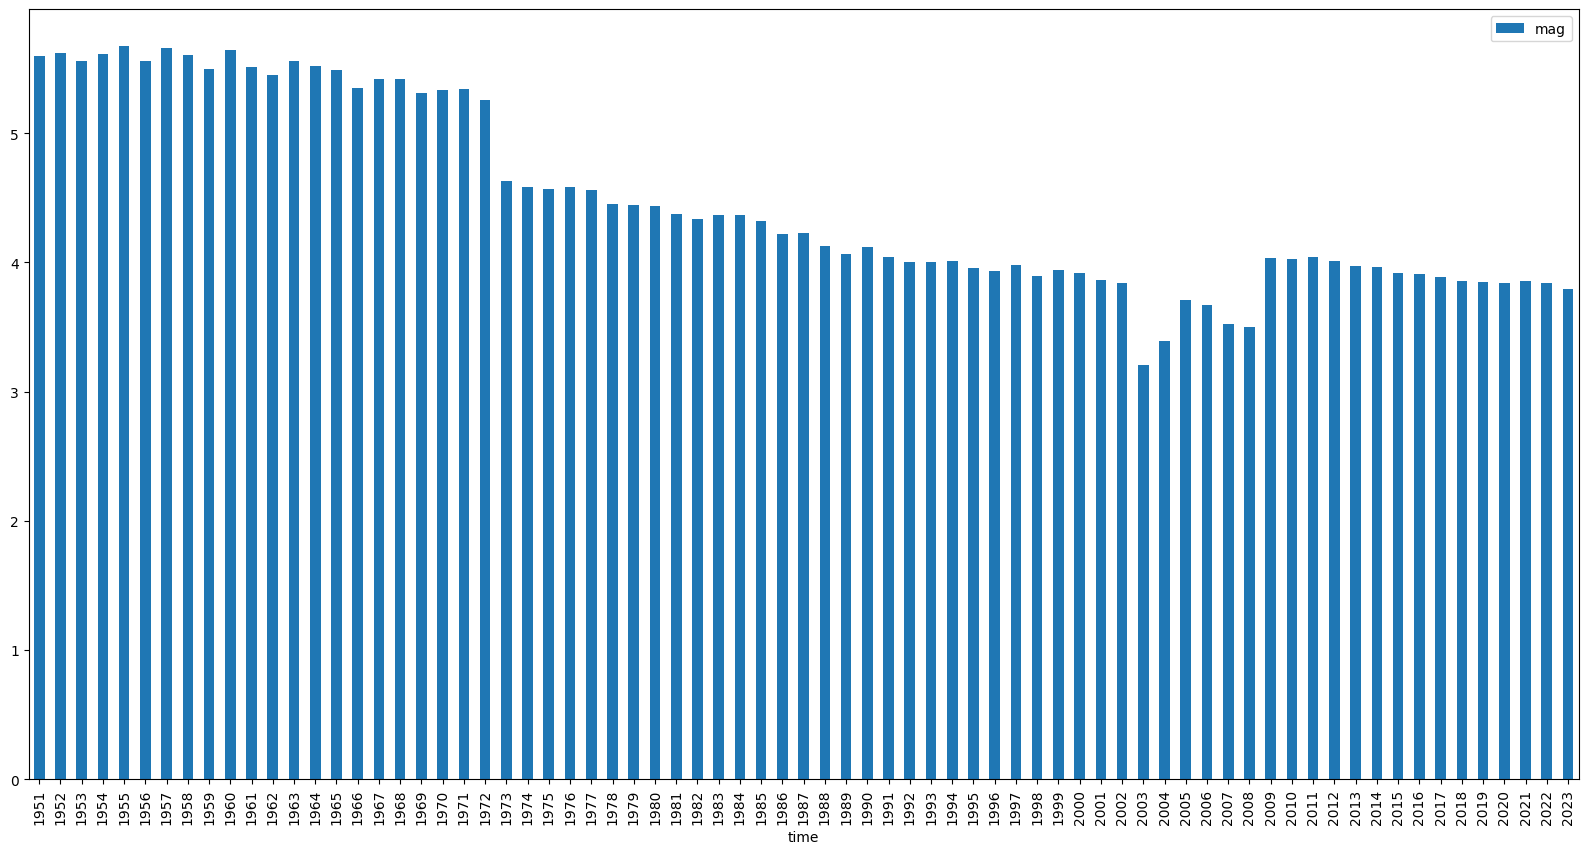

In [16]:
# get mean magnitude per region per year
df.groupby(["time", "pos"]).agg({"mag": "mean"}).reset_index().groupby("time").agg({"mag": "mean"}).plot.bar(figsize=(20, 10))

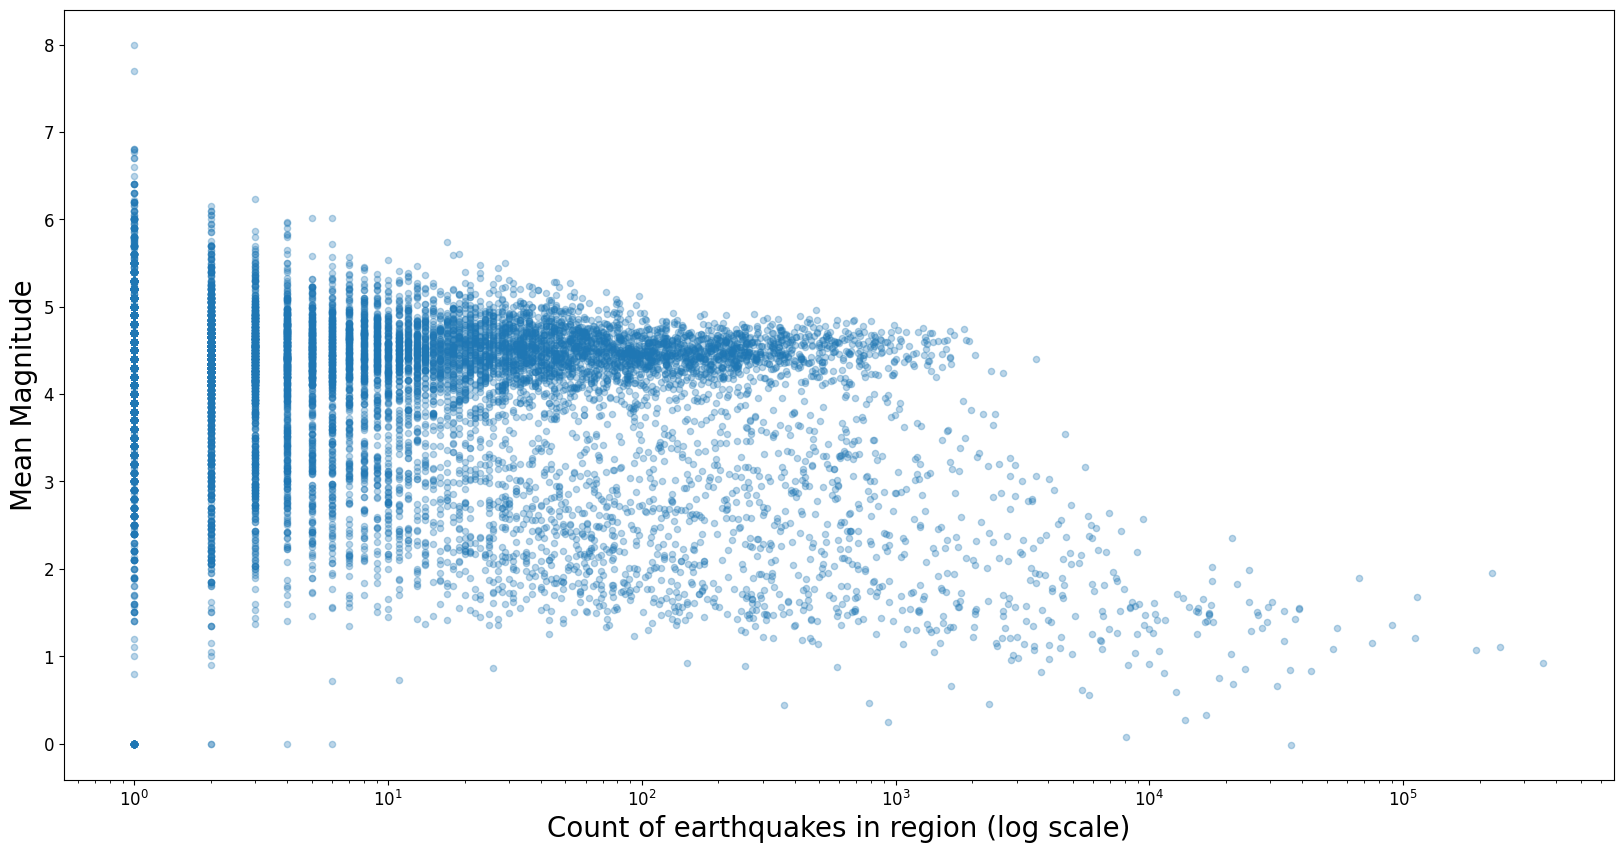

In [17]:
df.groupby(["pos"]).agg({"mag": "mean", "time": "count"}).reset_index().plot.scatter(x="time", y="mag", figsize=(20, 10), alpha=0.3)
plt.xscale("log")
plt.xlabel("Count of earthquakes in region (log scale)", fontsize=20)
plt.ylabel("Mean Magnitude", fontsize=20)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

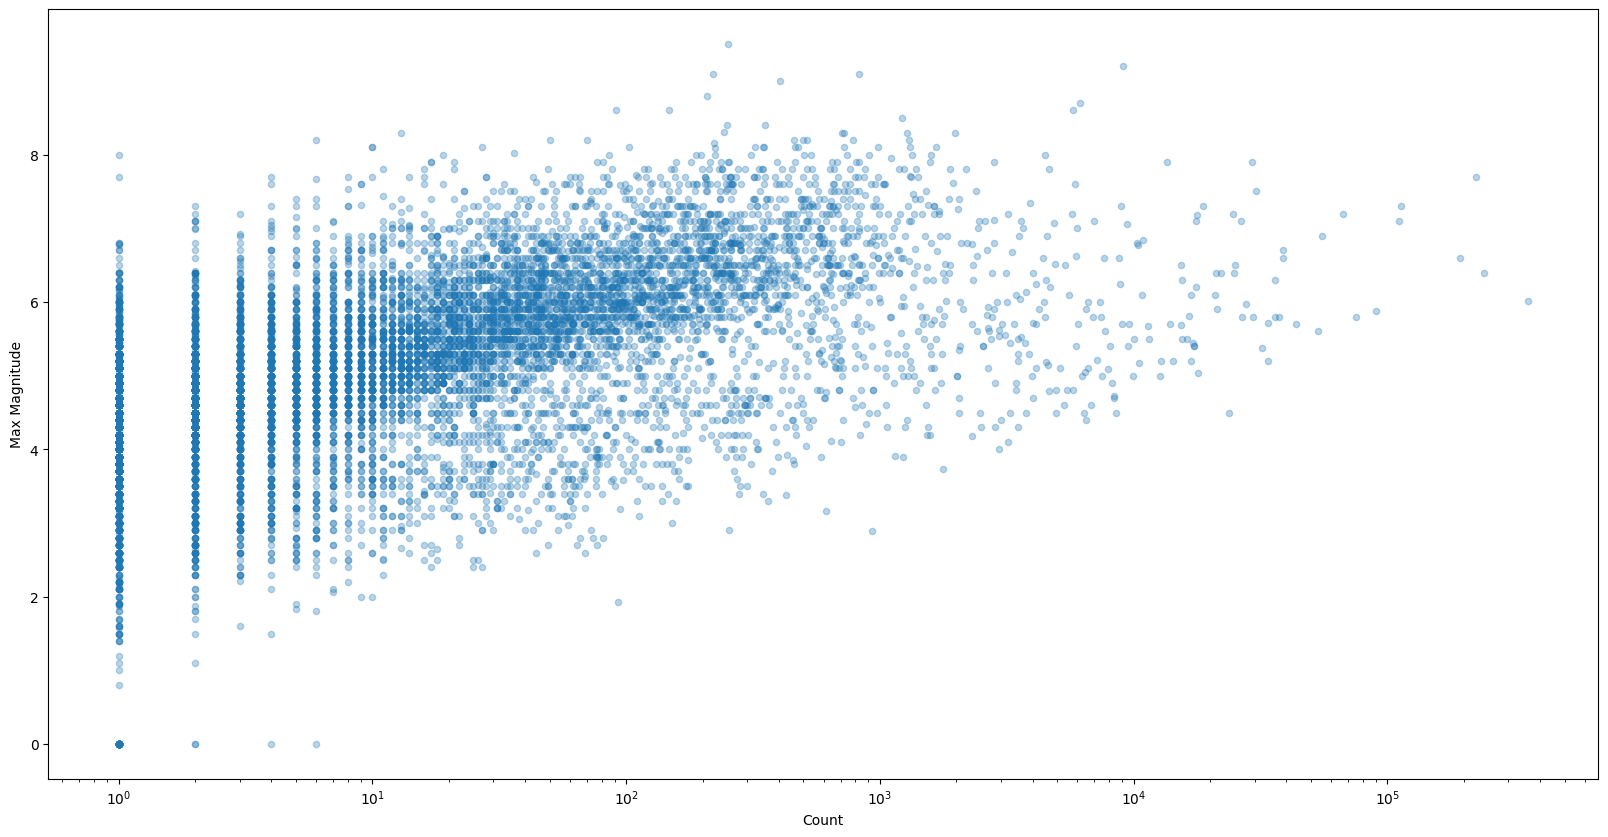

In [18]:
df.groupby(["pos"]).agg({"mag": "max", "time": "count"}).reset_index().plot.scatter(x="time", y="mag", figsize=(20, 10), alpha=0.3)
plt.xscale("log")
plt.xlabel("Count")
plt.ylabel("Max Magnitude")
plt.show()

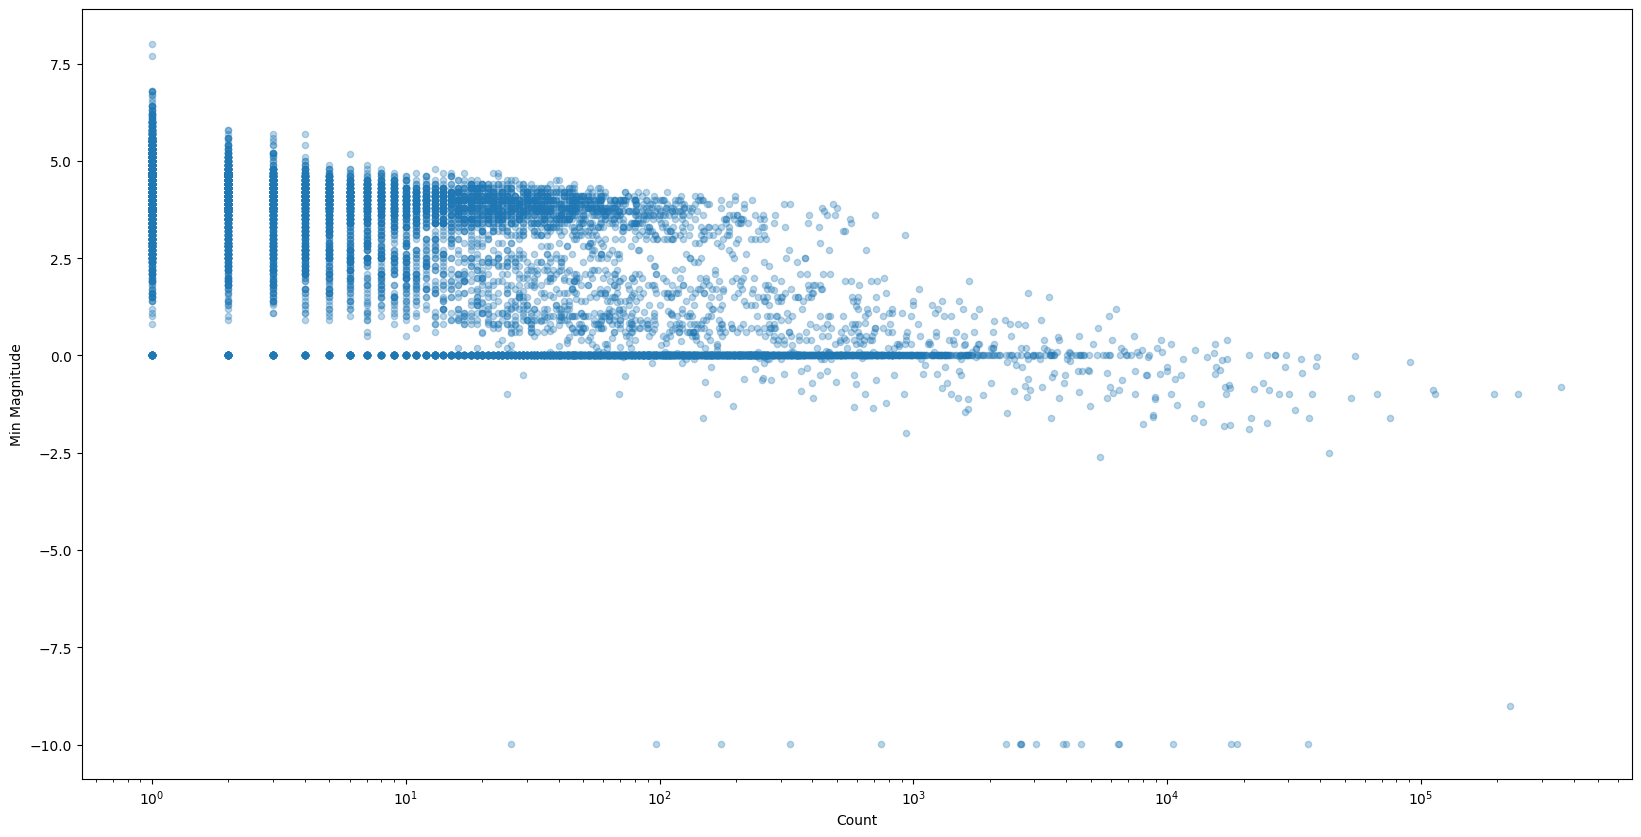

In [20]:
df.groupby(["pos"]).agg({"mag": "min", "time": "count"}).reset_index().plot.scatter(x="time", y="mag", figsize=(20, 10), alpha=0.3)
plt.xscale("log")
plt.xlabel("Count")
plt.ylabel("Min Magnitude")
plt.show()

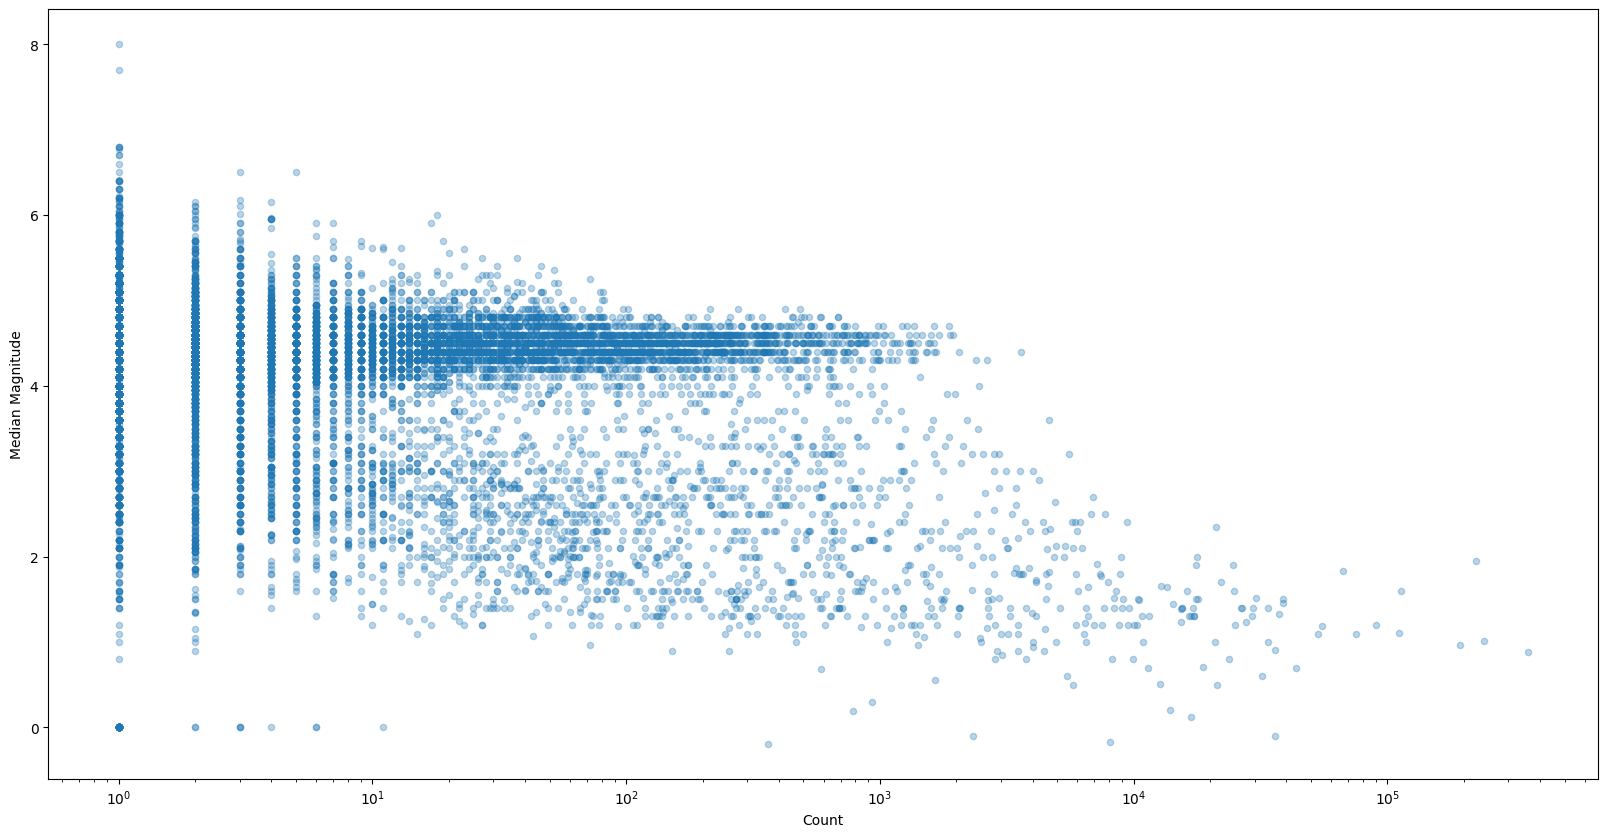

In [19]:
df.groupby(["pos"]).agg({"mag": "median", "time": "count"}).reset_index().plot.scatter(x="time", y="mag", figsize=(20, 10), alpha=0.3)
plt.xscale("log")
plt.xlabel("Count")
plt.ylabel("Median Magnitude")
plt.show()